# 类与对象 Class and Object

Python是一种面对对象的编程语言，这意味着其大多数代码和数据都是在对象中储存的 e.g string

我们目前接触到的几乎所有数据结构都是对象

**类 class**

类是一种概念，一种设计草图。类中包含属性attribute（其实就是大家常用的变量），用以实例化后储存数据。类也包含函数（或者称作方法method），用于处理数据。类本身一般是无法使用的。（我们不能驾驶汽车草图）

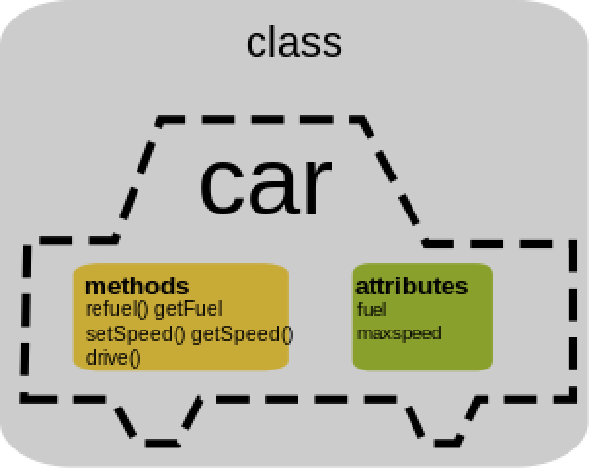

对象是类的实例化产物，一个类实例化出来的对象也叫作这个类的实例。相当于按照类这个设计草图构建出来的实物（按照汽车草图造一辆车）。

例如 string s = 'a 123' s就是一个对象，里面储存的数据就是 'a 123'

s.strip()，就是调用了s中的方法来处理s的数据。当然，对象的方法和我们所学的函数几乎没有区别，也是可以有输入参数，返回值之类的。

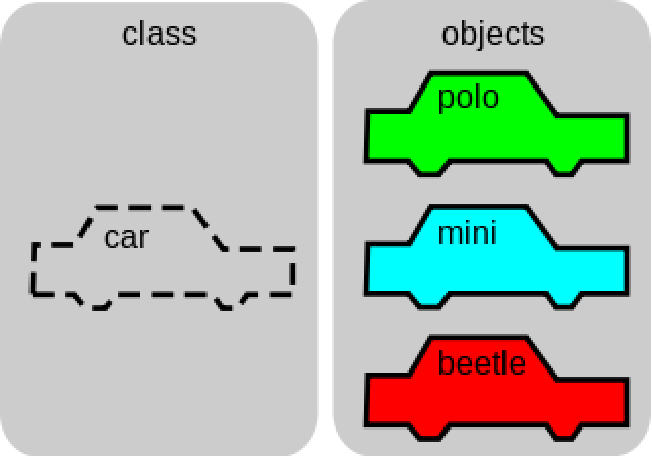

对象由以下组成：

1.名称：每个对象只有唯一个名字（变量名）。我们使用这个名字来操作对象

2.状态：反映了对象的性质。（就是对象里面储存的变量是什么）

3.行为：对象中可以使用的方法

用类实例化出来的对象具有相同的结构（意味着他们拥有相同类型的变量和相同的方法）。但是他们彼此独立（他们有些各自的变量存各自的东西）。一个类可以有多个对象

**创建类、对象**

使用关键字class声明一个类，后面紧跟类名，冒号表示类的开始。以下所有缩进代码均属于该类

直接声明变量即可声明属性

In [9]:
class myclass:
    def __init__(self):
        pass
    x = 5

创建对象

创建对象需要调用类的初始化函数 \_\_init\_\_()。但是不用使用该名称。只要使用类名即可（类的构造不止这一个函数）

实际上当我们创建一个实例时，在\_\_init\_\_()函数发生作用前，还有一个\_\_new\_\_()函数帮我们构造了实例(不用管这个)。他们一起被称为类的构造器

In [10]:
a = myclass()

\_\_init\_\_()函数

该函数是类的初始化函数，在创建对象时必须调用，用以初始化对象中的属性。

当我们没有写初始化函数时，Python会自动帮助我们添加空的初始化函数

其参数中必须包含self，（不是self也可以，可以是其他名字。他会默认将第一个参数视为本实例），表示本实例。

当我们想要使用本实例中的属性时，必须使用self，否则会被认为是一个普通的函数中的临时变量

实际上类中所有函数第一个参数都必须是self，用于保证可以使用到本实例的属性。调用函数时python会自动帮我们填充self参数，我们应当忽略这个参数，从第二个开始填

使用类中属性

使用对象名+ . +属性名即可

In [11]:
print(a.x)

5


当然我们也可以在外部改变对象的属性

In [12]:
a.x = 123456789
print(a.x)

123456789


类中的属性有两种，一种是实例属性，属于实例（每个实例对象的这种属性互相独立）；另一种是类属性，本类的所有实例对象共享这个属性

实例属性：在类的函数中使用self创建

类属性：在任意函数之外创建

In [13]:
class myclass:
    def __init__(self):
        pass
    x = 5

访问类属性

访问类属性需要直接使用类名访问

In [15]:
a = myclass()
print(a.x)
b = myclass()
print(b.x)
myclass.x = 123
print(a.x)
print(b.x)

5
5
123
123


访问实例属性

所有使用self，在函数中创建的属性都属于实例属性。如果实例属性与类属性名称相同，则会覆盖类属性。创建了对象后使用对象名修改其中类属性也会为这个对象创建一个新的实例属性并覆盖类属性

In [18]:
class myclass:
    def __init__(self, num):
        self.x = num

a = myclass(123)
print(a.x)
b = myclass(234)
print(b.x)
print(myclass.x)

123
234


AttributeError: type object 'myclass' has no attribute 'x'

In [20]:
class myclass:
    x = 5
    def __init__(self, num):
        self.x = num
        
a = myclass(123)
print(a.x)
b = myclass(234)
print(b.x) 
print(myclass.x) 

123
234
5


In [21]:
class myclass:
    x = 5
    def __init__(self):
        pass
    
a = myclass()
print(a.x)
b = myclass()
print(b.x)
b.x = 123456789
myclass.x = 123
print(a.x)
print(b.x)

5
5
123
123456789


\_\_str\_\_()函数

本函数是用来格式化输出的。当我们使用print()等输出时，Python会自动调用\_\_str\_\_()函数，获取其返回值输出

如果我们没有创建本函数，Python会默认使用一个输出对象信息的\_\_str\_\_()函数

In [22]:
class myclass:
    def __init__(self):
        self.x = 5
        
a = myclass()
print(a)

In [45]:
class myclass:
    def __init__(self):
        self.x = 5
    
    def __str__(self):
        return 'hello'
        
a = myclass()
print(a)
print(a.__str__())

hello
hello


实例的函数

我们可以类似声明函数一样在类中声明函数，然后就可以使用实例来调用他们（实际上我们刚刚的初始化函数，格式化输出函数就是这样）

In [24]:
class myclass:
    def __init__(self, num):
        self.x = num
    
    def __str__(self):
        return 'hello'
    
    def sum(self, a, b):
        return a + b + self.x
    
a = myclass(5)
print(a.sum(1,2))

8


类的函数

有实例的函数，自然就会有类的函数。

创建类的函数使用@classmethod装饰符声明。第一个参数会被认为是本类（和self一样），一般是用cls

类的函数只能使用类的属性（使用cls调用）。可以用类名直接调用类的函数。当然也可以使用实例调用

In [27]:
class myclass:    
    def __init__(self, num):
        self.x = num
    
    def __str__(self):
        return 'hello'
    
    def sum(self, a, b):
        return a + b + self.x
    
    var = 5
    @classmethod
    def addvar(cls, a):
        return cls.var + a
    
print(myclass.addvar(100))
a = myclass(12345)
print(a.addvar(110))

105
115


静态函数

类中还有一种函数叫做静态函数，属于类。但是和类函数的区别在于，静态函数无法访问类的属性（它不会默认第一个参数为本类）。

创建静态函数使用@staticmethod装饰符

可以使用类名或者实例调用

In [28]:
class myclass:    
    def __init__(self, num):
        self.x = num
        
    @staticmethod
    def add(a, b):
        return a+b
    
print(myclass.add(1,2))
a = myclass(12345)
print(a.add(110, 120))

3
230


\_\_del\_\_() 析构函数

当我们不再使用一个实例时，该实例占用的资源需要被释放，此时Python会调用实例的析构函数完成它最后的遗言（类似炉石的亡语hhh）

In [29]:
class myclass:    
    def __init__(self, num):
        self.x = num
        
    def __del__(self):
        print('Bye!')
    
a = myclass(12345)
del a

Bye!


实例的一生

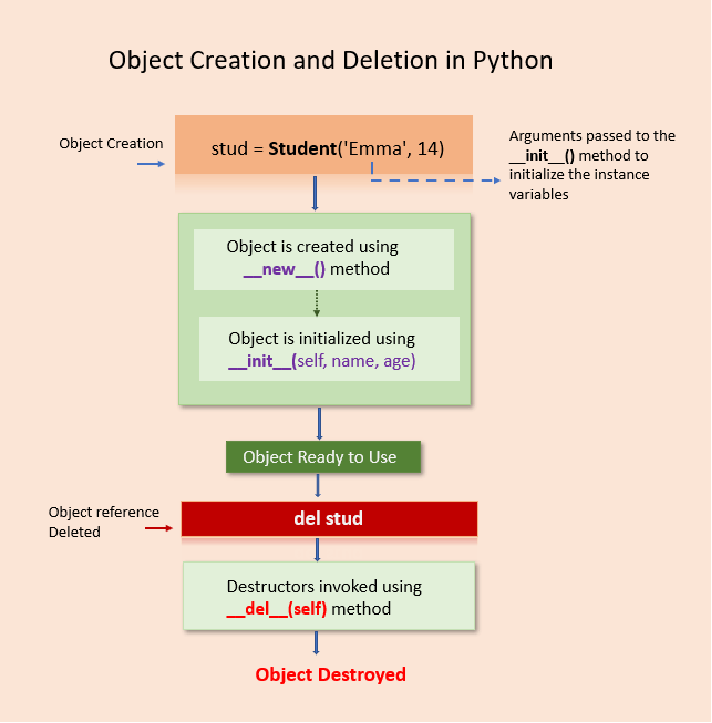

**类的继承**

当我们想要减少代码的重复时，我们使用函数

当我们想要减少类的重复时，我们使用继承

父类是被继承的类，子类是继承自另一个类的类。

子类拥有和父类相同的所有的属性和方法，我们不需要再写一遍。

继承可以被分为五类

Single inheritance

Multiple Inheritance

Multilevel inheritance

Hierarchical Inheritance

Hybrid Inheritance


单继承 Single inheritance

儿子只有一个父亲

继承的声明只需要在子类后加一个括号，点名要继承的父类即可

In [1]:
# Base class
class Vehicle:
    x = 5
    def Vehicle_info(self):
        print('Inside Vehicle class')
        
# Child class
class Car(Vehicle):
    def car_info(self):
        print('Inside Car class')
        
# Create object of Car
car = Car()
# access Vehicle's info using car object
car.Vehicle_info()
car.car_info()
print(car.x)


Inside Vehicle class
Inside Car class
5


多继承 Multiple Inheritance

儿子有多个父亲

当父亲中存在有属性或者函数名冲突时，儿子会继承第一个父亲

In [31]:
# Parent class 1
class Person:
    def person_info(self, name, age):
        print('Inside Person class')
        print('Name:', name, 'Age:', age)
        
# Parent class 2
class Company:
    def company_info(self, company_name):
        print('Inside Company class')
        print('Name:', company_name)
        
# Child class
class Employee(Person, Company):
    def Employee_info(self, salary):
        print('Inside Employee class')
        print('Salary:', salary)
        
# Create object of Employee
emp = Employee()
# access data
emp.person_info('Jessa', 28)
emp.company_info('Google')
emp.Employee_info(12000)

Inside Person class
Name: Jessa Age: 28
Inside Company class
Name: Google
Inside Employee class
Salary: 12000


In [11]:
# Parent class 1
class Person:
    def company_info(self, company_name):
        print('Inside Person class')
        print('Name:', company_name)
        
# Parent class 2
class Company:
    def company_info(self, company_name):
        print('Inside Company class')
        print('Name:', company_name)
        
# Child class
class Employee(Person, Company):
    def Employee_info(self, salary):
        print('Inside Employee class')
        print('Salary:', salary)
        
# Create object of Employee
emp = Employee()
# access data
emp.company_info('Google')
emp.Employee_info(12000)

Inside Person class
Name: Google
Inside Employee class
Salary: 12000


多级别继承 Multilevel inheritance

当然，子类A也可以是另一个类B的父类。此时B会拥有A中所有的属性和方法，包括A从其父类继承而来的

In [32]:
# Base class
class Vehicle:
    def Vehicle_info(self):
        print('Inside Vehicle class')
        
# Child class 1
class Car(Vehicle):
    def car_info(self):
        print('Inside Car class')
        
# Child class 2
class SportsCar(Car):
    def sports_car_info(self):
        print('Inside SportsCar class')

# Create object of SportsCar
s_car = SportsCar()
# access Vehicle's and Car info using SportsCar object
s_car.Vehicle_info()
s_car.car_info()
s_car.sports_car_info()


Inside Vehicle class
Inside Car class
Inside SportsCar class


层次继承 Hierarchical Inheritance

一个父亲可以有多个儿子

In [33]:
# Base class
class Vehicle:
    def info(self):
        print("This is Vehicle")

# Child class 1
class Car(Vehicle):
    def car_info(self, name):
        print("Car name is:", name)

# Child class 2
class Truck(Vehicle):
    def truck_info(self, name):
        print("Truck name is:", name)

obj1 = Car()
obj1.info()
obj1.car_info('BMW')
obj2 = Truck()
obj2.info()
obj2.truck_info('Ford')

This is Vehicle
Car name is: BMW
This is Vehicle
Truck name is: Ford


混合继承 Hybrid inheritance

一个儿子有多个父亲，他们可能也存在有继承关系

In [9]:
# Example of hierarchical and multiple inheritance exists together.
class Vehicle:
    def info(self):
        print("This is Vehicle")

class Car(Vehicle):
    def car_info(self, name):
        print("Car name is:", name)
        
class Truck(Vehicle):
    def car_info(self, name):
        print("Truck name is:", name)

class SportsCar(Car, Vehicle):
    def sports_car_info(self):
        print("Inside SportsCar class")
        
a = SportsCar()
a.info()

This is Vehicle


封装

封装是面向对象编程的基本概念之一。它描述了在单个单元中捆绑数据和方法的概念。

直白点就是说，把很多散开的数据打包在一起，管理起来方便很多。

类是封装的一个例子，因为它将所有数据成员(实例变量)和方法绑定到一个单元中。

访问等级

类中的有些属性、函数，我们不希望外部的用户使用，我们可以设置访问等级

一共有三种等级：

Public 谁都能用

Protected 只有本类和子类可以使用(对其他py文件来说)

Private 只有本类可以使用(对其他py文件来说)

Public

Python默认所有属性和方法都是public的

Protcted

使用一个下划线开头表示本属性、方法是protected

(实际上protected并不存在于Python类中，只存在于一般变量。但是工程师们在写类的时候为了保持一致会遵守这个规则)

In [42]:
class myclass:
    _x = 1
    
    def _speak(self):
        print('blabla')

Private

使用两个下划线开头表示本属性、方法是protected

In [43]:
class myclass:
    __x = 1
    
    def __speak(self):
        print('blabla')

多态

一种工程思想。我们可以让子类去重写父类的方法，从而使得我们在处理数据时只用考虑其大体类别而不用考虑具体的类。

In [44]:
class Vehicle:
    def car_info(self):
        print("This is Vehicle")

class Car(Vehicle):
    def car_info(self, name):
        print("Car name is:", name)
        
class Truck(Vehicle):
    def car_info(self, name):
        print("Truck name is:", name)

cars = [Car(), Truck(), Car(), Truck()]

for car in cars:
    car.car_info('123')

Car name is: 123
Truck name is: 123
Car name is: 123
Truck name is: 123
